Visualization and Naive Model of Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random

ref_col = pd.read_csv('headers.csv')
ref_col = list(ref_col.columns)

data = pd.read_csv('patient_priority.csv')
for col in data.columns:
    if col not in ref_col:
        data.drop([col], axis=1, inplace=True)

data.dropna(subset= ["esi"], inplace=True)
data.dropna(subset= ["triage_vital_rr"], inplace=True)
data.dropna(subset= ["glucose_median"], inplace=True)
data['triage_vital_hr'] = data['triage_vital_hr'].apply(lambda v: random.randint(60, 100))
data['triage_vital_sbp'] = data['triage_vital_sbp'].apply(lambda v: random.randint(100, 160))
data['triage_vital_o2'].fillna(100, inplace=True)
data['triage_vital_temp'] = data['triage_vital_temp'].apply(lambda v: random.uniform(95.0, 99.4))
for i in list(data.columns):
    if "cc_" in i:
        data[i].fillna(0, inplace=True)

print(data)
data.to_csv('pre-processed.csv', index=False, encoding='utf-8')

      esi  age  gender  bronchitis  cardiaarrst  cardiacanom  carditis  \
7     3.0   66    Male           0            0            0         0   
15    2.0   80    Male           0            0            0         0   
16    3.0   80    Male           0            0            0         0   
18    2.0   80    Male           0            0            0         0   
20    3.0   80    Male           0            0            0         0   
...   ...  ...     ...         ...          ...          ...       ...   
9480  4.0   66  Female           0            0            0         0   
9482  2.0   18  Female           0            0            0         0   
9483  4.0   18  Female           0            0            0         0   
9489  3.0   43  Female           0            0            0         0   
9499  3.0   59  Female           0            0            0         0   

      chestpain  chfnonhp  copd  ...  cc_hypotension  cc_influenza  cc_nausea  \
7             1         1     

In [1]:
'''
age - histogram
blood pressure - histogram
chest pain - bar chart
esi - bar

'''
def two_scales(ax1, time, data1, data2, c1, c2):

    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('exp')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('sin')
    return ax1, ax2

C:\Users\royde\AppData\Local\Temp\ipykernel_29240\15461139.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


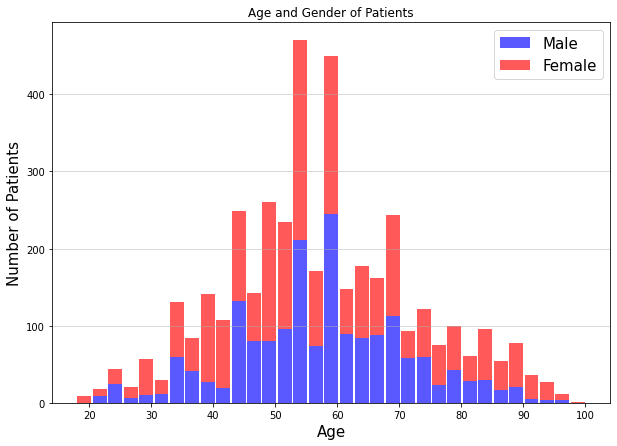

In [4]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(figsize=(10,7))
age_male = data[data['gender']=='Male']['age']
age_female = data[data['gender']=='Female']['age']
n, bins, patches = plt.hist(x = [age_male, age_female], stacked=True, bins='auto', color=['blue', 'red'], alpha=0.65, rwidth=0.90)

plt.grid(axis='y', alpha = 0.60)
plt.legend(['Male', 'Female'], fontsize = 15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Patients', fontsize=15)
plt.title('Age and Gender of Patients')

plt.show()

<AxesSubplot: title={'center': 'esi Value of Patients'}, xlabel='esi Value', ylabel='Number of Patients'>

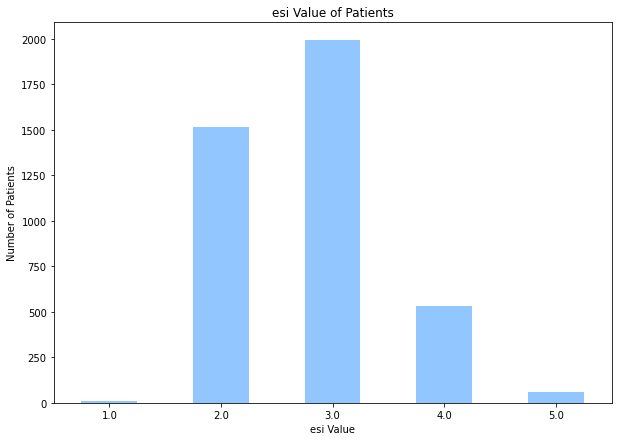

In [76]:
data['esi'].value_counts().sort_index().plot.bar(rot=0, title='esi Value of Patients', figsize=(10,7), 
                                                    xlabel='esi Value', ylabel='Number of Patients')


C:\Users\royde\AppData\Local\Temp\ipykernel_85036\4193301124.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


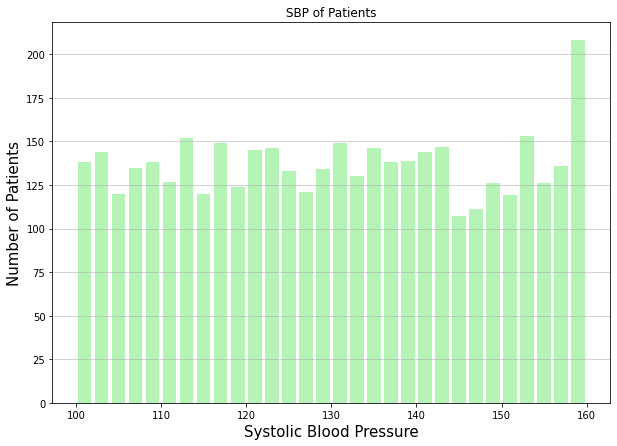

In [88]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(figsize=(10,7))
n, bins, patches = plt.hist(x = data['triage_vital_sbp'], bins=30, color=['lightgreen'], alpha=0.65, rwidth=0.80)

plt.grid(axis='y', alpha = 0.70)
plt.xlabel('Systolic Blood Pressure', fontsize=15)
plt.ylabel('Number of Patients', fontsize=15)
plt.title('SBP of Patients')

plt.show()

<AxesSubplot: title={'center': 'Number of Patients with Chest Pain'}, xlabel='Chest Pain', ylabel='Number of Patients'>

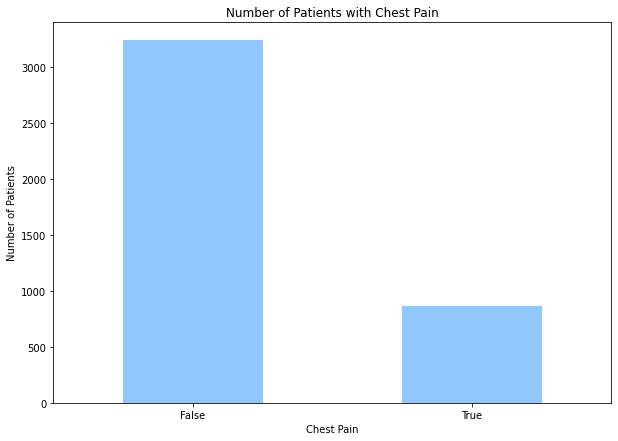

In [87]:
boolean_dict = {0: "False", 1: "True"}
data['cc_chestpain'].value_counts().sort_index().rename(index=boolean_dict).plot.bar(rot=0, title='Number of Patients with Chest Pain', figsize=(10,7), 
                                                    xlabel='Chest Pain', ylabel='Number of Patients')
